<a href="https://colab.research.google.com/github/makenna-allen/IS-4487/blob/main/Labs/Scripts/lab_05_megatelco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5

## Outline

 - Identify the target variable for an analysis based on the business problem.
 - Compute the mean of a binary variable.
 - Plot a numeric (or count) variable against a categorical
    variable.
 - Calculate a count (and a proportion) for a categorical variable
    and visualize the result into a plot.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_05_megatelco_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [57]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the Megatelco dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe


In [19]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/megatelco_leave_survey.csv?raw=true')
print (df)

      college  income  data_overage_mb  data_leftover_mb  data_mb_used  \
0         one  403137               70                 0          6605   
1        zero  129700               67                16          6028   
2        zero   69741               60                 0          1482   
3         one  377572                0                22          3005   
4        zero  382080                0                 0          1794   
...       ...     ...              ...               ...           ...   
14994     one  307114               12                28          4672   
14995     one  429983              312                43          5858   
14996     one  363250              348                82          1812   
14997    zero  221768              334                55          3552   
14998    zero  188472              343                 6          7802   

       text_message_count    house  handset_price  \
0                     199   841317            653   
1    

## Clean up the dataset  

In [20]:
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 10000)]
df_clean = df_clean.drop(columns=['id'])
df_clean.describe()

income  data_overage_mb  data_leftover_mb  data_mb_used  \
count   14993.000000     14993.000000      14993.000000  14993.000000   
mean   242025.183752       153.580804         37.524511   4202.893951   
std    109556.878020       113.002587         28.044642   2202.492183   
min     52491.000000         0.000000          0.000000    400.000000   
25%    147844.000000        54.000000         12.000000   2297.000000   
50%    241656.000000       151.000000         35.000000   4223.000000   
75%    336470.000000       242.000000         62.000000   6080.000000   
max    432000.000000       380.000000         89.000000   8000.000000   

       text_message_count         house  handset_price  \
count        14993.000000  1.499300e+04    14993.00000   
mean           135.626025  8.771541e+05      780.65057   
std             48.837544  2.869273e+05      326.59192   
min             52.000000  3.200010e+05      215.00000   
25%             93.000000  6.444950e+05      498.00000   
50%            135.000000  8.762710e+05      778.00000   
75%            178.000000  1.098785e+06     1064.00000   
max            220.000000  1.456389e+06     1350.00000   

       over_15mins_calls_per_month  average_call_duration  
count                 14990.000000           14993.000000  
mean                     10.571181               9.733676  
std                       8.401508               5.194211  
min                       0.000000               1.000000  
25%                       3.000000               5.000000  
50%                       9.000000              10.000000  
75%                      17.000000              14.000000  
max                      35.000000              19.000000

## Calculate distribution of the outcome  

What is the proportion of people who churned?

In [21]:
df_clean[['house','leave']].groupby('leave').mean().round(2)

house
leave           
LEAVE  757607.46
STAY   995921.88

# Create basic charts

- Bar chart
- Histogram
- Box plot
- Scatter plot

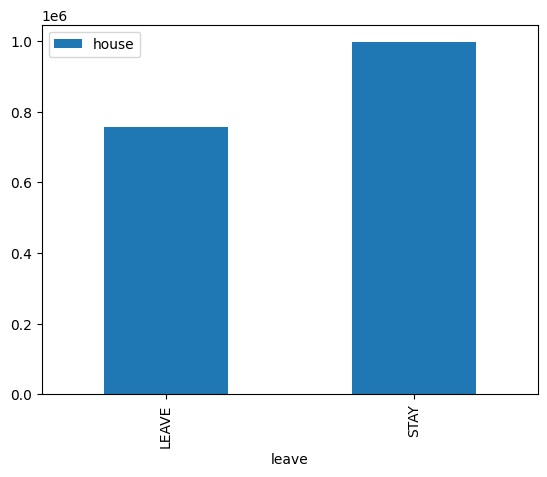

In [23]:
df_clean[['house','leave']].groupby('leave').mean('house').plot.bar()
ylabel = 'House Price (in millions)'

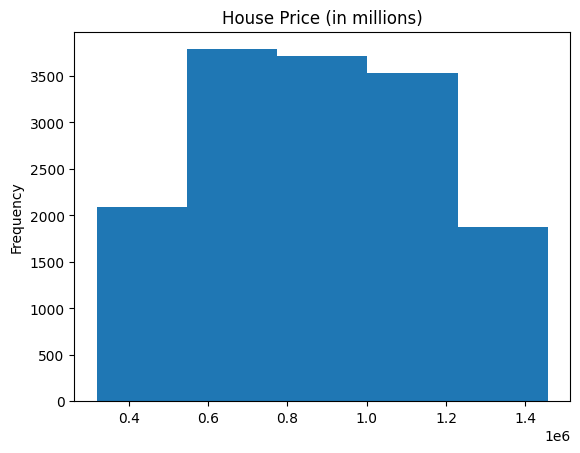

In [17]:
hist = df_clean['house'].plot.hist(bins=5,title='House Price (in millions)')

<Axes: title={'center': 'house'}, xlabel='[leave]'>

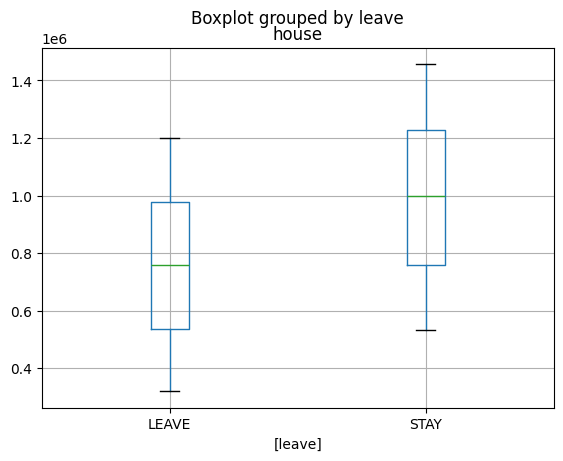

In [12]:
df_clean[['leave','house']].boxplot(by='leave')

# Explore Relationships

###How does College affect leaving?

<Axes: xlabel='leave'>

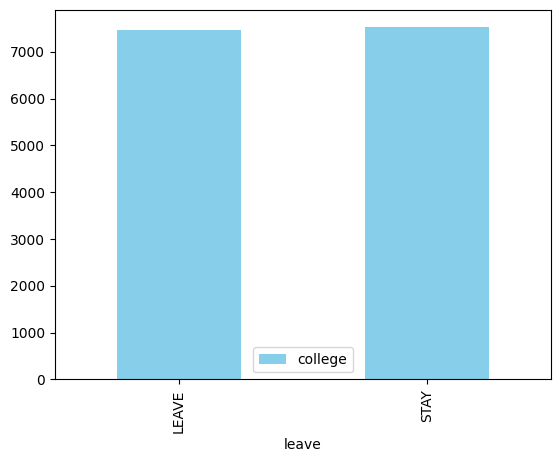

In [35]:
df_clean.groupby('leave')[['college']].count().plot.bar(color=['skyblue'])

<Axes: xlabel='leave'>

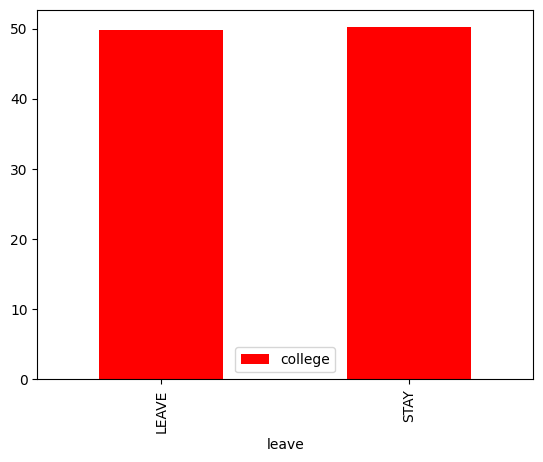

In [36]:
college_summary = df_clean[['college','leave']].groupby('leave').count()
college_summary['college'] = (college_summary['college'] / college_summary['college'].sum()) * 100
college_summary.plot.bar(color='red')

### How does phone price affect leaving?

<Axes: xlabel='leave'>

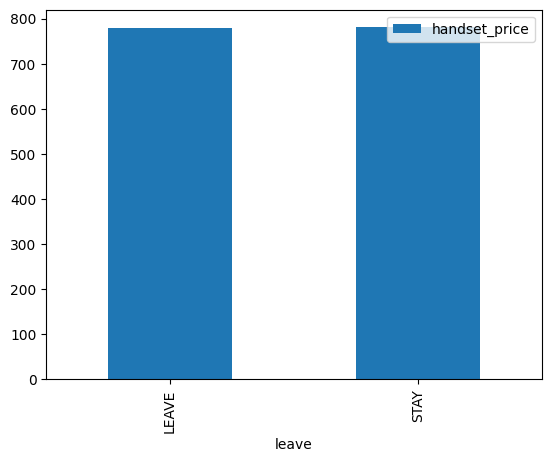

In [15]:
handset_price_summary = df_clean[['handset_price','leave']].groupby('leave').mean(['handset_price'])
handset_price_summary.plot.bar()

### How about considering leaving?

<Axes: xlabel='leave'>

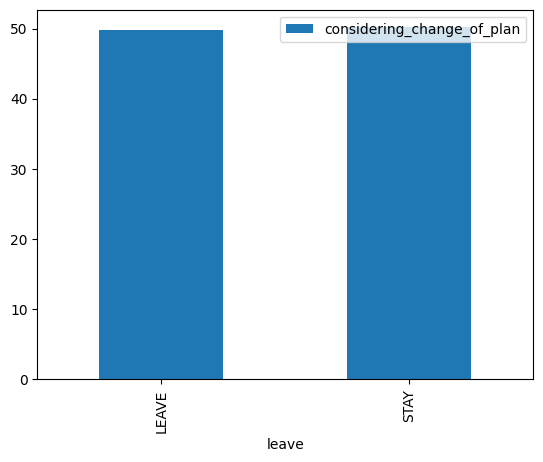

In [39]:
plan = df_clean[['considering_change_of_plan','leave']].groupby('leave').count()
plan['considering_change_of_plan'] = (plan['considering_change_of_plan'] / plan['considering_change_of_plan'].sum()) * 100
title = 'Considering Change of Plan'
plan.plot.bar()

## Create a Pair Plot
➡️ Assignment Tasks
- Import seaborn
- Create a Seaborn "pairplot" using all variables, with the color determine by "leave"
- Display the plot

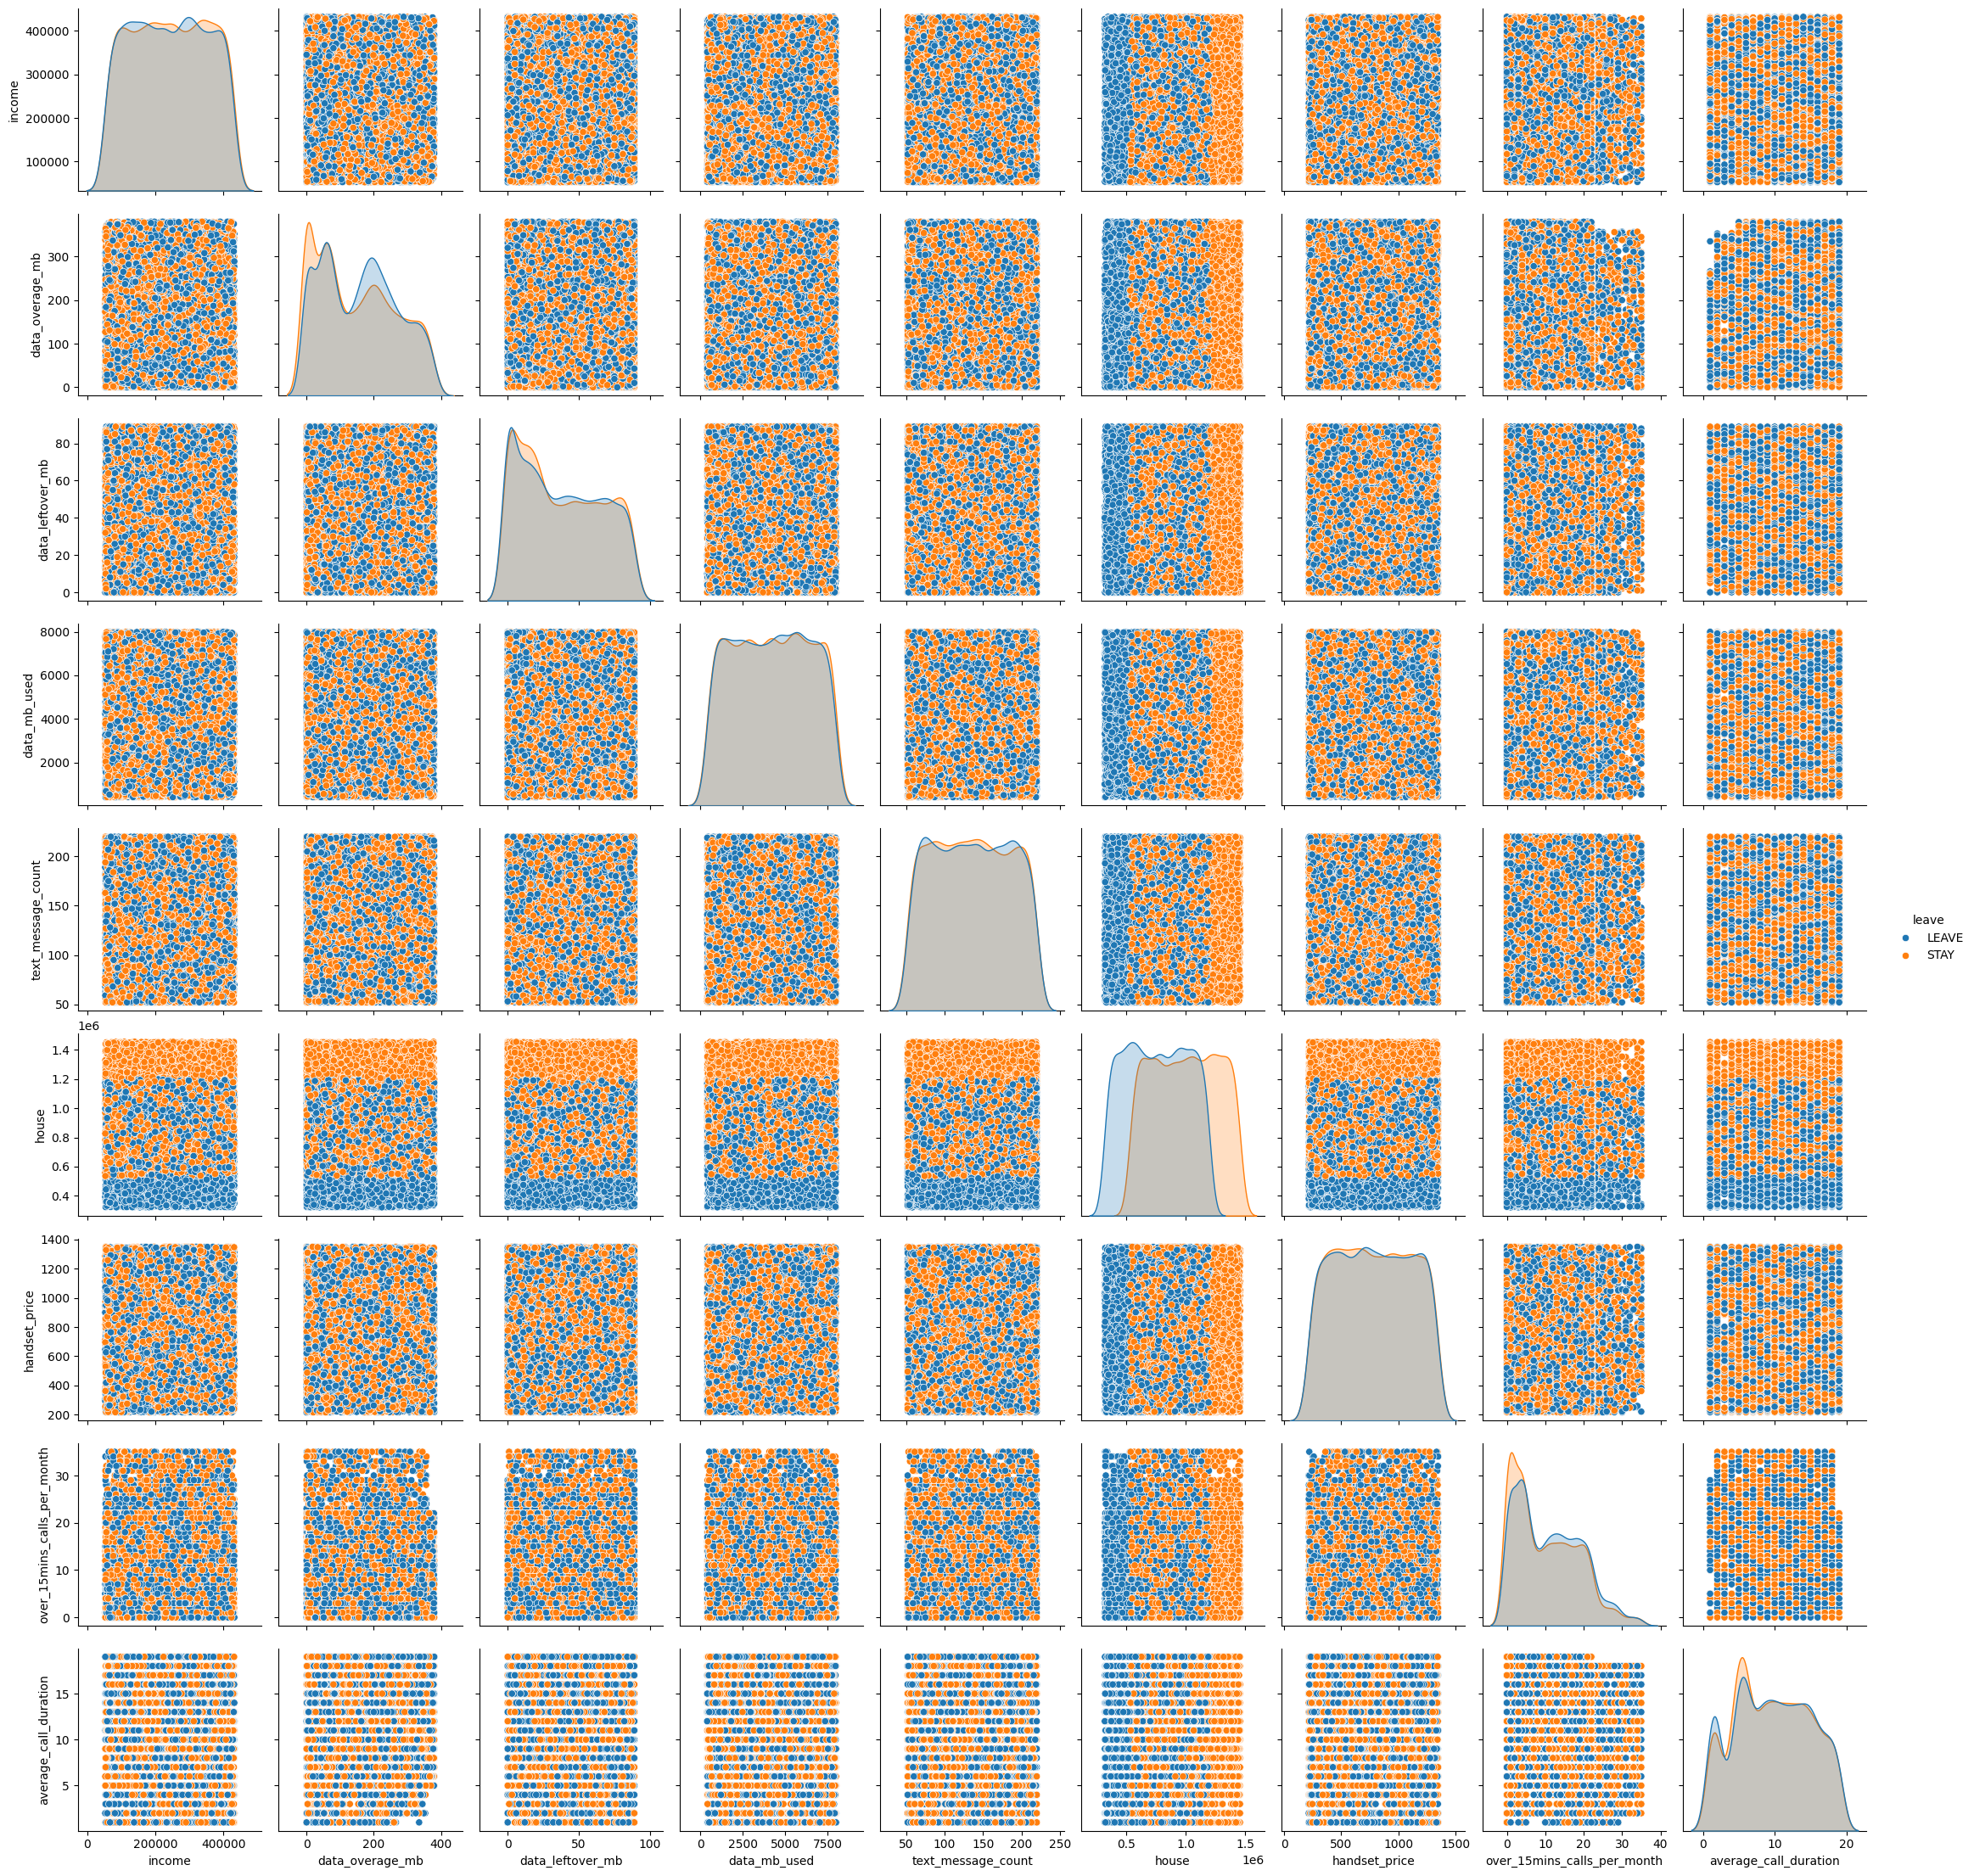

In [24]:
sns.pairplot(df_clean, hue="leave")

## Additional Cleanup

➡️ Assignment Tasks
- Remove any records with null values from the dataframe

In [25]:
df_clean = df_clean.dropna()

## Summarize Data

➡️ Assignment Tasks
- Create a second set of charts that include the outlier values (house, income, price).   How do the outliers affect the values in the charts?

<ipython-input-60-a426900e640b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='leave', y='house', data=df_clean, palette="viridis")


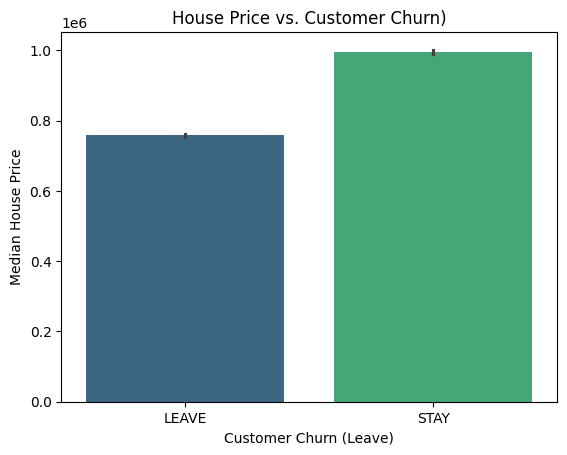

In [60]:
sns.barplot(x='leave', y='house', data=df_clean, palette="viridis")
plt.title('House Price vs. Customer Churn)')
plt.xlabel('Customer Churn (Leave)')
plt.ylabel('Median House Price')
plt.xticks(rotation=0)
plt.show()

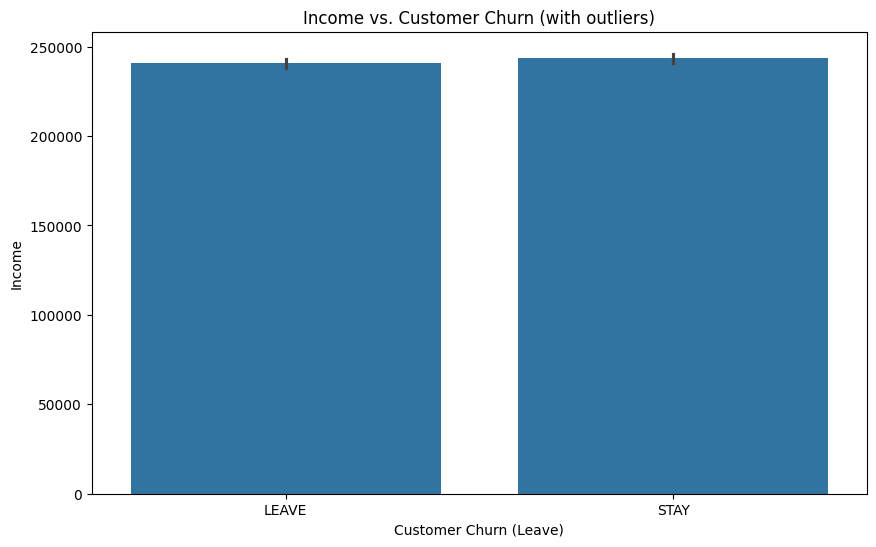

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x= 'leave', y='income', data=df_clean)
plt.title('Income vs. Customer Churn (with outliers)')
plt.xlabel('Customer Churn (Leave)')
plt.ylabel('Income')
plt.show()


<ipython-input-61-31b3556d250d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='leave', y='handset_price', data=df_clean, palette= "pastel")


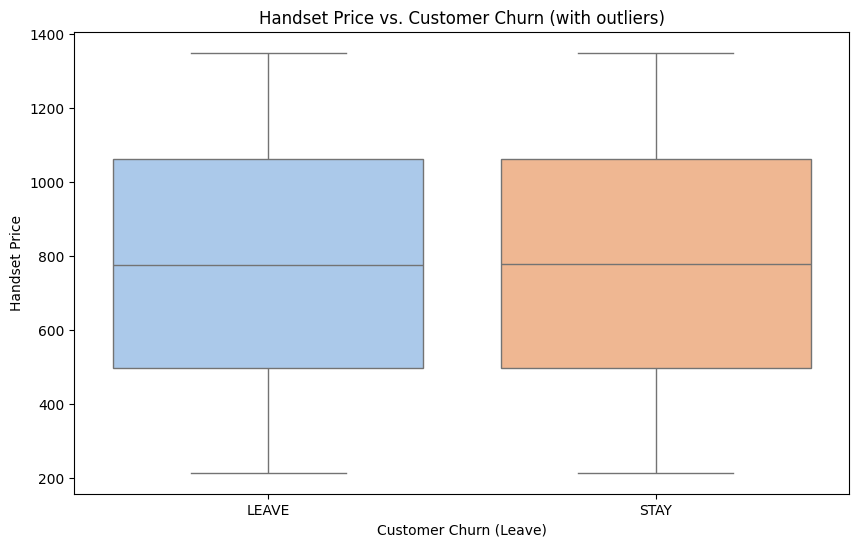

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave', y='handset_price', data=df_clean, palette= "pastel")
plt.title('Handset Price vs. Customer Churn (with outliers)')
plt.xlabel('Customer Churn (Leave)')
plt.ylabel('Handset Price')
plt.show()


## Covariance

➡️ Assignment Task
- Create a covariance matrix using all of the applicable independent variables

In [71]:
numerical_cols = df_clean.select_dtypes(include=['number']).columns
covariance_matrix = df_clean[numerical_cols].cov()
covariance_matrix

income  data_overage_mb  data_leftover_mb  \
income                       1.200138e+10     11001.605766      30146.542522   
data_overage_mb              1.100161e+04     12768.194213        436.135270   
data_leftover_mb             3.014654e+04       436.135270        786.436533   
data_mb_used                 1.001925e+06      -601.627211        399.750973   
text_message_count           3.158607e+04        20.652534         -9.043419   
house                        1.671001e+08   -866166.068584      67031.711539   
handset_price                1.338752e+05        50.798069         15.714284   
over_15mins_calls_per_month -4.774906e+02       280.780052         20.130598   
average_call_duration        7.453071e+03       133.005838         -2.333390   

                             data_mb_used  text_message_count         house  \
income                       1.001925e+06        31586.070439  1.671001e+08   
data_overage_mb             -6.016272e+02           20.652534 -8.661661e+05   
data_leftover_mb             3.997510e+02           -9.043419  6.703171e+04   
data_mb_used                 4.851544e+06          -77.562474 -2.566297e+05   
text_message_count          -7.756247e+01         2385.121552  3.479269e+04   
house                       -2.566297e+05        34792.687298  8.231686e+10   
handset_price                6.608887e+03           55.092142  5.993818e+05   
over_15mins_calls_per_month  2.060304e+01            2.487227 -3.146823e+04   
average_call_duration       -2.852071e+02            0.093998  6.798869e+03   

                             handset_price  over_15mins_calls_per_month  \
income                       133875.170253                  -477.490563   
data_overage_mb                  50.798069                   280.780052   
data_leftover_mb                 15.714284                    20.130598   
data_mb_used                   6608.886983                    20.603035   
text_message_count               55.092142                     2.487227   
house                        599381.832667                -31468.232997   
handset_price                106641.985797                    14.469424   
over_15mins_calls_per_month      14.469424                    70.585333   
average_call_duration            -2.460156                     4.303671   

                             average_call_duration  
income                                 7453.070668  
data_overage_mb                         133.005838  
data_leftover_mb                         -2.333390  
data_mb_used                           -285.207091  
text_message_count                        0.093998  
house                                  6798.868558  
handset_price                            -2.460156  
over_15mins_calls_per_month               4.303671  
average_call_duration                    26.979038

➡️ Assignment Task
- In 100 words or less, describe what insight you can derive from the covariance matrix.  What does it tell us about the data?  

This covariance matrix shows us which variables are strongly related and in terms of relationships with each other. We can also see which variables do not have strong relationships. This can be seen based on postive vs. negative numbers and how close the values are to zero. Overall we can see results of all the interactions the variables have with one another.

In [79]:
from google.colab import drive
drive.mount('/content/drive')

!jupyter nbconvert --to html "Module3_Script_v1_2.ipynb"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[NbConvertApp] Converting notebook Module3_Script_v1_2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 8014478 bytes to Module3_Script_v1_2.html
